#1. Scaling in machine learning is a data preprocessing technique used to adjust the range or distribution of feature values. It ensures that all features contribute equally to the model training process, avoiding biases caused by varying scales of data.
Why is Scaling Important?

    Algorithm Sensitivity:
        Some algorithms (e.g., gradient descent-based models like Linear Regression, Logistic Regression, and Neural Networks) are sensitive to the scale of input features. Features with larger values can dominate the learning process, leading to suboptimal results.

    Distance-based Algorithms:
        Models like k-Nearest Neighbors (k-NN), Support Vector Machines (SVM), and Principal Component Analysis (PCA) rely on distance calculations. Without scaling, features with larger ranges can dominate the distance metric, affecting performance.

    Faster Convergence:
        Scaling accelerates convergence of optimization algorithms by ensuring that all features are in similar ranges.

    Better Interpretability:
        When features are scaled, the coefficients or weights in some models (e.g., Linear Regression) are easier to interpret and compare.

        # data transformation techniques

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

In [10]:
df={
    'age':[20, 30, 40, 50, 60],
    'income':[50000, 80000, 100000, 120000, 150000],
    'weight':[60, 70, 80, 90, 100]
}
# convert this data to pandas df

df = pd.DataFrame(df)
df.head()

,age,income,weight
0,20,50000,60
1,30,80000,70
2,40,100000,80
3,50,120000,90
4,60,150000,100


In [ ]:
# import the scalar -3 to 3

scaler = StandardScaler()
# fit the scalar of data
scaled_df=scaler.fit_transform(df)
scaled_df
# convert in to pndas dataframe

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,income,weight
0,-1.414214,-1.468051,-1.414214
1,-0.707107,-0.587220,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.587220,0.707107
4,1.414214,1.468051,1.414214


# min max scalr 0 to 1

In [11]:
scaler = MinMaxScaler()
# fit the scalar of data
scaled_df=scaler.fit_transform(df)
scaled_df
# convert in to pndas dataframe

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,income,weight
0,0.00,0.0,0.00
1,0.25,0.3,0.25
2,0.50,0.5,0.50
3,0.75,0.7,0.75
4,1.00,1.0,1.00


In [12]:
# 3. max -abs scalar -1 to 1

scaler = MaxAbsScaler()
# fit the scalar of data
scaled_df=scaler.fit_transform(df)
scaled_df
# convert in to pndas dataframe

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,income,weight
0,0.333333,0.333333,0.6
1,0.500000,0.533333,0.7
2,0.666667,0.666667,0.8
3,0.833333,0.800000,0.9
4,1.000000,1.000000,1.0


In [14]:
# 4. use robust scalar it fixes outliers too -1 to 1 agar outliers hoge unko bhi range mein le aayega
scaler = RobustScaler()
# fit the scalar of data
scaled_df=scaler.fit_transform(df)
scaled_df
# convert in to pndas dataframe

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()


,age,income,weight
0,-1.0,-1.25,-1.0
1,-0.5,-0.50,-0.5
2,0.0,0.00,0.0
3,0.5,0.50,0.5
4,1.0,1.25,1.0


# which used most
if our data algorithm deal with minus values then use StandardScaler  # mostly used z core ke base pe standardize karna

else if our data algorithm deal with positive values then use MinMaxScaler

else if our data algorithm deal with both positive and minus values then use RobustScaler or MaxAbsScaler

else if our data algorithm deal with outliers then use RobustScaler or MaxAbsScaler

# Transformation of data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# generate non -normal data(exponentional distribution)
np.random.seed(0)

data = np.random.exponential(scale=2, size=1000)

# convert to pandas dataframe

df = pd.DataFrame(data, columns=['Value'])

df.head()
df.shape

(1000, 1)

<Axes: xlabel='Value', ylabel='Count'>

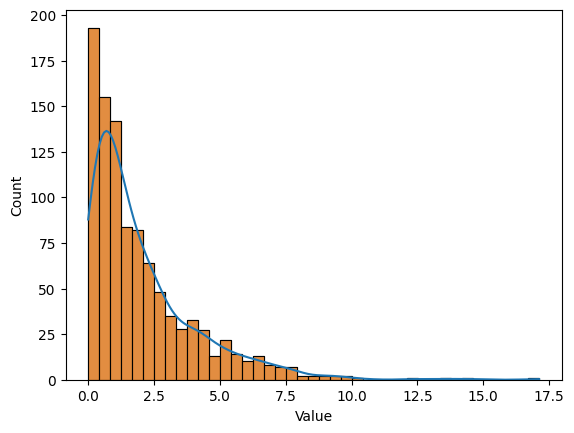

In [20]:
# make a histplot with kde

sns.histplot(df['Value'], kde=True)


<Axes: xlabel='Box_Cox', ylabel='Count'>

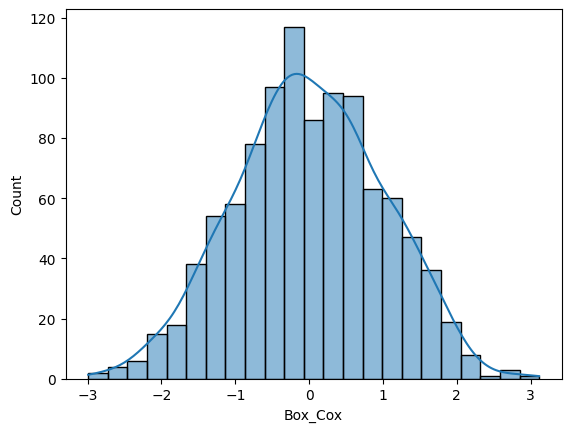

In [41]:
from sklearn.preprocessing import PowerTransformer
# 1. box cox transform  -- data must be positive for box cox transform check this by df.min 
pt_boxcox = PowerTransformer(method='box-cox')
df['Box_Cox'] = pt_boxcox.fit_transform(df[['Value']])



sns.histplot(df['Box_Cox'], kde=True)





<Axes: xlabel='Value', ylabel='Count'>

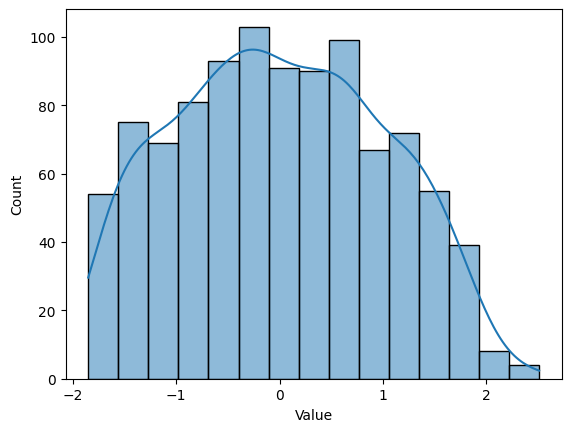

In [44]:
# 2. yeo johnson
pt_yeojohnson = PowerTransformer(method='yeo-johnson')

# fit and transform the data

df_yeojohnson['Value'] = pt_yeojohnson.fit_transform(df[['Value']])

sns.histplot(df_yeojohnson['Value'], kde=True)


In [48]:
# qunatiile transform normal
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer

# Set random seed for reproducibility
np.random.seed(0)

# Step 1: Generate synthetic data using an exponential distribution
data = np.random.exponential(scale=2, size=1000)

# Step 2: Convert data to a pandas DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Step 3: Apply Quantile Transformer with 'normal' output distribution
qt_normal = QuantileTransformer(output_distribution='normal')

# Fit and transform the data
df['Quantile_Transformed'] = qt_normal.fit_transform(df[['Value']])

# Show the transformed data
print(df.head())


      Value  Quantile_Transformed
0  1.591749              0.162552
1  2.511862              0.587964
2  1.846446              0.286135
3  1.574402              0.157469
4  1.102097             -0.154930


Transformed Data (First 5 Rows):
      Value  Quantile_Transformed  YeoJohnson_Transformed  Box_Cox_Transformed
0  1.591749              0.162552                0.179335             0.179335
1  2.511862              0.587964                0.677331             0.677331
2  1.846446              0.286135                0.339698             0.339698
3  1.574402              0.157469                0.167607             0.167607
4  1.102097             -0.154930               -0.202107            -0.202107


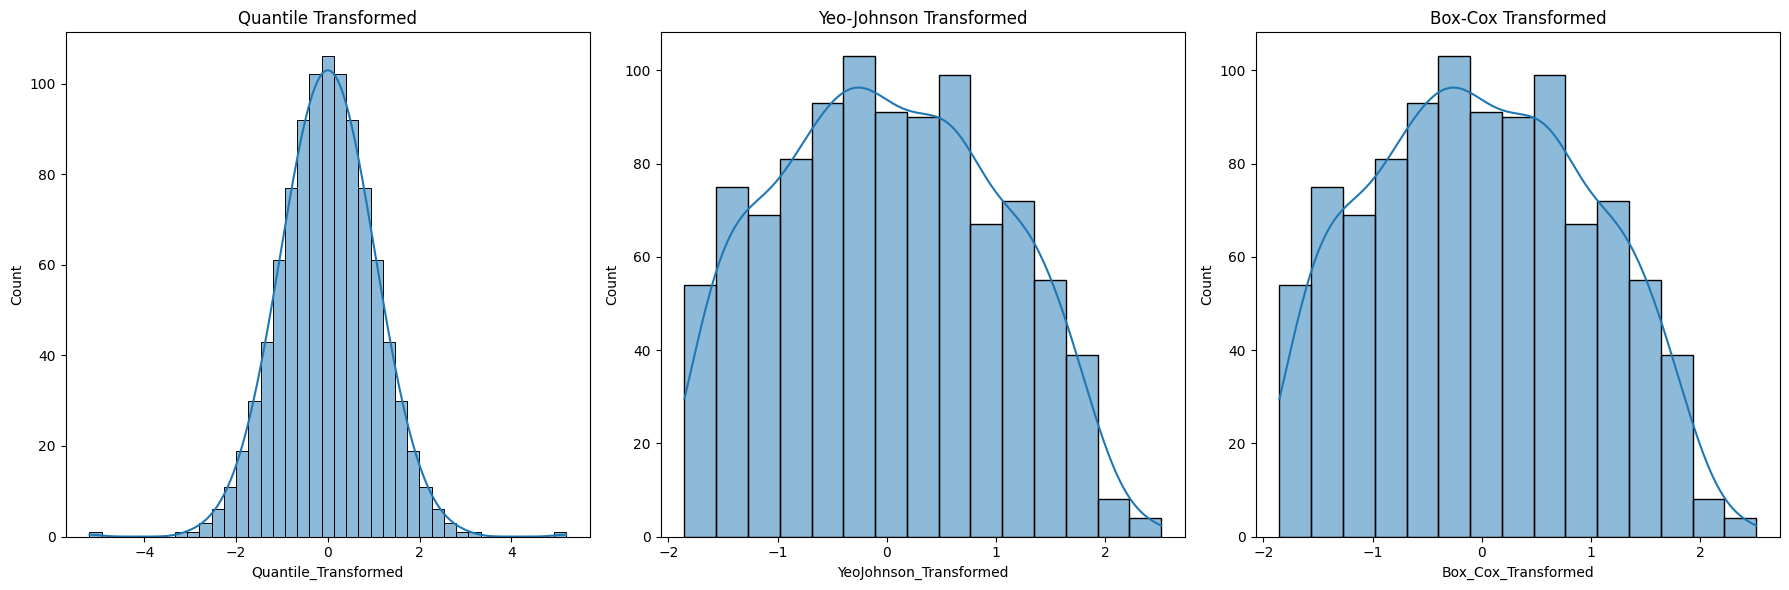

In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(0)

# Step 1: Generate synthetic data using an exponential distribution
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(data, columns=['Value'])

# Step 2: Apply Quantile Transformation
qt = QuantileTransformer(output_distribution='normal')
df['Quantile_Transformed'] = qt.fit_transform(df[['Value']])

# Step 3: Apply Yeo-Johnson Transformation
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
df['YeoJohnson_Transformed'] = pt_yeojohnson.fit_transform(df[['Value']])

# Step 4: Apply Box-Cox Transformation (add 1 to ensure positivity)
pt_boxcox = PowerTransformer(method='box-cox')
df['Box_Cox_Transformed'] = pt_boxcox.fit_transform(df[['Value']] + 1)

# Step 5: Display the first few rows of the transformed data
print("Transformed Data (First 5 Rows):")
print(df.head())

# Step 6: Plot all three transformations side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Quantile Transformed data
sns.histplot(df['Quantile_Transformed'], kde=True, ax=axes[0])
axes[0].set_title('Quantile Transformed')

# Plot Yeo-Johnson Transformed data
sns.histplot(df['YeoJohnson_Transformed'], kde=True, ax=axes[1])
axes[1].set_title('Yeo-Johnson Transformed')

# Plot Box-Cox Transformed data
sns.histplot(df['Box_Cox_Transformed'], kde=True, ax=axes[2])
axes[2].set_title('Box-Cox Transformed')

# Show the plots
plt.tight_layout()
plt.show()


Power Transform vs. Quantile Transform

Both Power Transform and Quantile Transform are techniques used to transform data into a more "normal" distribution. However, they work in different ways and are used for distinct purposes. Below is a comparison of both:
Power Transform (PowerTransformer)

    Purpose: Power transformation methods, like Yeo-Johnson and Box-Cox, aim to make the data more Gaussian (normal) by stabilizing variance and reducing skewness. They are used to normalize data that doesn't follow a normal distribution.

    Methods:
        Box-Cox: Works only for positive data. It transforms the data using a power function to stabilize variance and make the data closer to a normal distribution.
        Yeo-Johnson: Works for both positive and negative values. It is an extension of the Box-Cox transformation.

    How it works:
        The power transformation applies a power function to the data to stabilize variance and improve normality. This can result in data that is more symmetrically distributed.

    Use Cases:
        When you want to correct skewness in the data.
        When you want to make data more Gaussian-like for modeling or statistical tests.
        Used when the data has a heavy skew and is non-Gaussian.

    Advantages:
        Can make non-Gaussian data more normal.
        Works well for both positive and negative data (Yeo-Johnson).

    Limitations:
        Not always effective for all types of distributions.
        Requires careful handling of negative values for Box-Cox.

Quantile Transform (QuantileTransformer)

    Purpose: The Quantile Transform maps the data to a uniform or normal distribution based on the ranks of the data. It does this by ranking the values and then transforming them into a uniform or normal distribution.

    How it works:
        This transformation replaces the original values with their corresponding quantiles (percentiles) and then maps them to a chosen output distribution (either uniform or normal).
        For a normal output, the transformed values are distributed according to a standard normal distribution (mean = 0, standard deviation = 1).

    Use Cases:
        When the data needs to be mapped to a specific distribution, like uniform or normal.
        Used when you want to preserve the rank structure of the data (ordinality) but make the distribution more normal or uniform.
        Can be used to handle outliers, as quantiles are less sensitive to extreme values.

    Advantages:
        Can handle outliers better than power transforms.
        Converts data into a uniform or normal distribution.
        Works for any kind of distribution (Gaussian or non-Gaussian).

    Limitations:
        May lose information about the original values since it depends heavily on ranks.
        The distribution transformation may not always preserve the original relationships between data points.

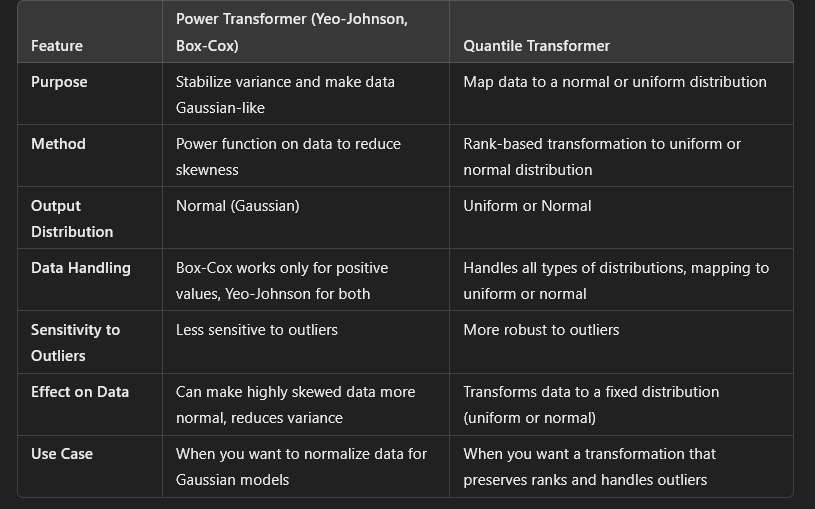
Which One to Choose?

    PowerTransformer (Box-Cox/Yeo-Johnson) is typically used when you're aiming to make the data more normal and reduce skewness.
    QuantileTransformer is useful when you want to map the data to a uniform or normal distribution and are less concerned with maintaining the exact relationships between the original values (especially if outliers are present).

In general, PowerTransformer works better when you need to correct skewness, and QuantileTransformer is ideal when you want to map the data to a specific distribution or handle outliers more effectively.

# Normalization l1 and l2

In [51]:
from sklearn.preprocessing import Normalizer
import numpy as np

# Sample data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# L1 Normalization
l1_normalizer = Normalizer(norm='l1')
data_l1 = l1_normalizer.fit_transform(data)
print("L1 Normalized Data:")
print(data_l1)

# L2 Normalization
l2_normalizer = Normalizer(norm='l2')
data_l2 = l2_normalizer.fit_transform(data)
print("\nL2 Normalized Data:")
print(data_l2)


L1 Normalized Data:
[[0.16666667 0.33333333 0.5       ]
 [0.26666667 0.33333333 0.4       ]
 [0.29166667 0.33333333 0.375     ]]

L2 Normalized Data:
[[0.26726124 0.53452248 0.80178373]
 [0.45584231 0.56980288 0.68376346]
 [0.50257071 0.57436653 0.64616234]]


# 2 more
# z-score normalization
1. standard scalr
2. #

# log transformation

Original Data Head:
   Value
0      1
1      2
2      3
3      4
4      5

Data Head After Log Transformations:
   Value  Log_1_Transformed  Log_2_Transformed
0      1           0.693147           0.000000
1      2           1.098612           1.000000
2      3           1.386294           1.584963
3      4           1.609438           2.000000
4      5           1.791759           2.321928


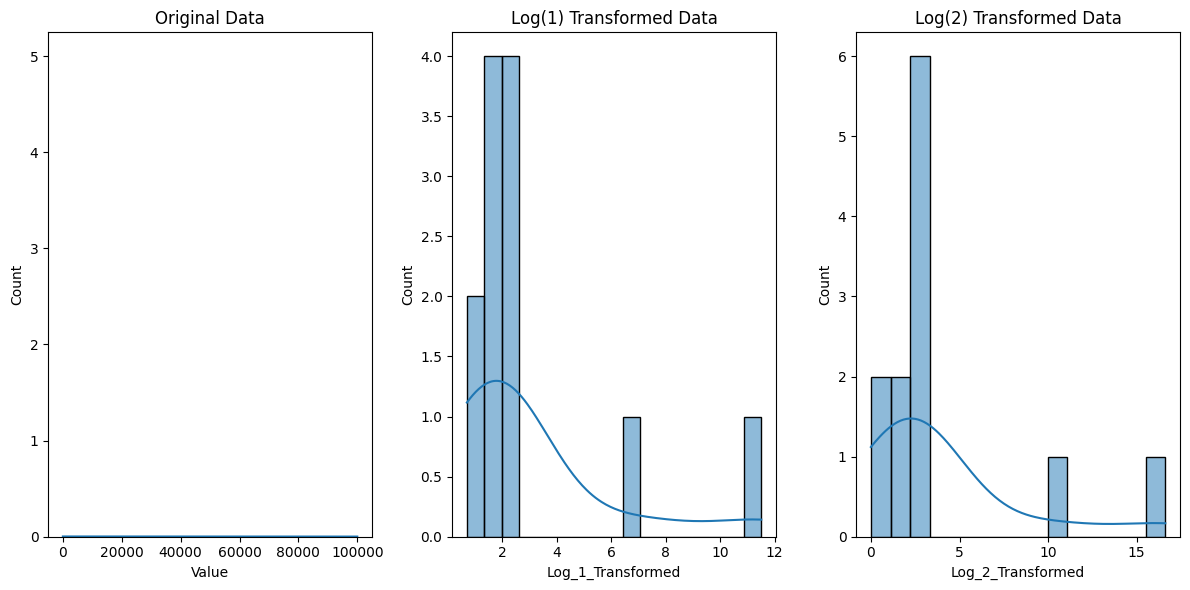

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data with skewed values
data = {'Value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000, 100000]}
df = pd.DataFrame(data)

# Display the original head before transformation
print("Original Data Head:")
print(df.head())

# Plot histogram of original data
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Value'], kde=True)
plt.title('Original Data')

# Apply log transformations

# Log(1) Transformation (Logarithm to the base of 1)
df['Log_1_Transformed'] = np.log1p(df['Value'])  # np.log1p is log(1 + x)

# Log(2) Transformation (Logarithm to the base of 2)
df['Log_2_Transformed'] = np.log2(df['Value'])

# Display the head after transformation
print("\nData Head After Log Transformations:")
print(df.head())

# Plot histograms of transformed data
plt.subplot(1, 3, 2)
sns.histplot(df['Log_1_Transformed'], kde=True)
plt.title('Log(1) Transformed Data')

plt.subplot(1, 3, 3)
sns.histplot(df['Log_2_Transformed'], kde=True)
plt.title('Log(2) Transformed Data')

plt.tight_layout()
plt.show()



Original Data Head:
   Value
0      1
1      2
2      3
3      4
4      5

Data Head After Transformations:
   Value  Log_1_Transformed  Log_2_Transformed  Box_Cox_Transformed  \
0      1           0.693147           0.000000            -1.858438   
1      2           1.098612           1.000000            -1.042001   
2      3           1.386294           1.584963            -0.645800   
3      4           1.609438           2.000000            -0.395807   
4      5           1.791759           2.321928            -0.217934   

   Yeo_Johnson_Transformed  
0                -1.661893  
1                -1.072154  
2                -0.711672  
3                -0.461096  
4                -0.273412  


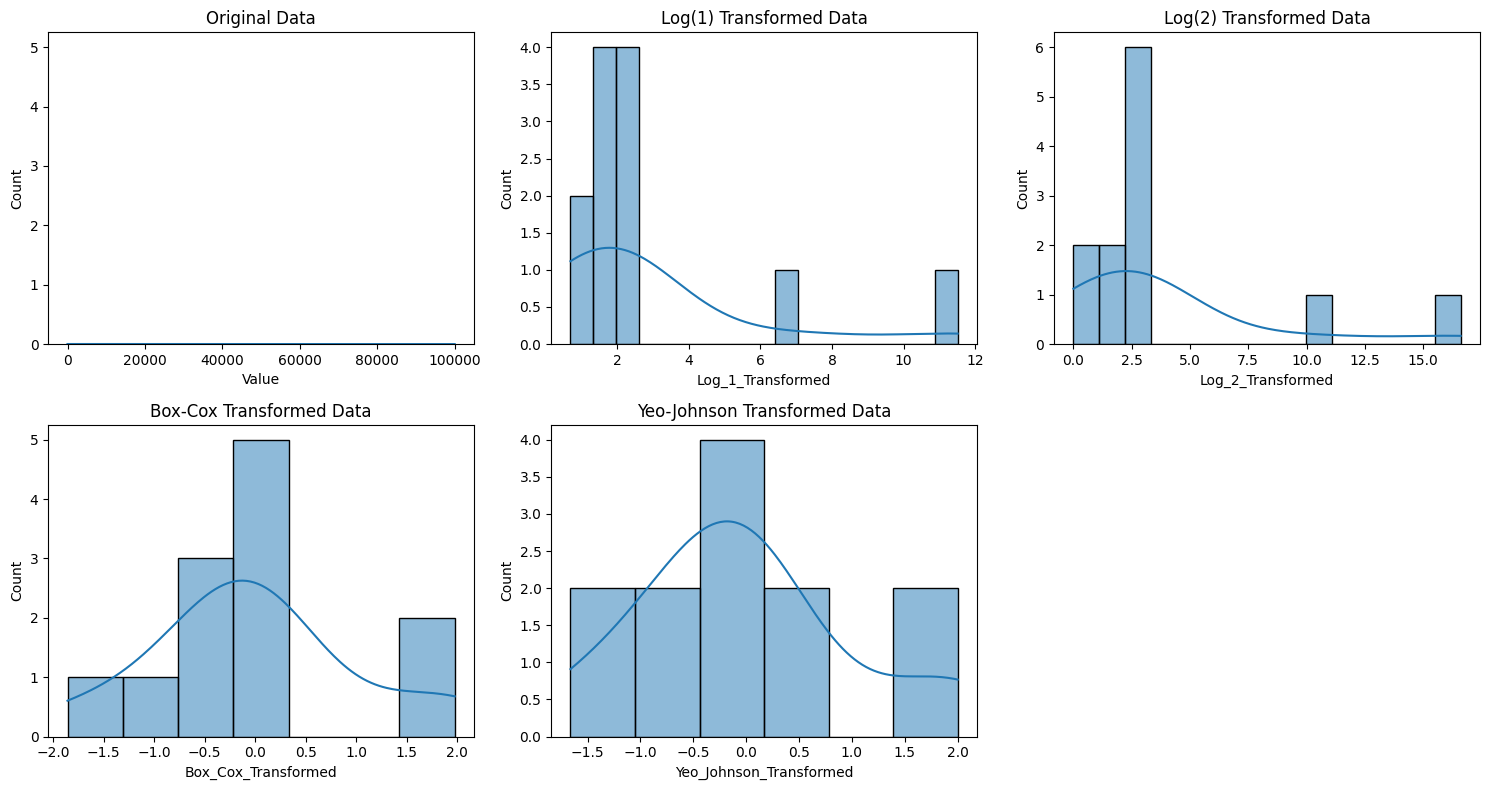

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Sample data with skewed values
data = {'Value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000, 100000]}
df = pd.DataFrame(data)

# Display the original head before transformation
print("Original Data Head:")
print(df.head())

# Plot histogram of original data
plt.figure(figsize=(15, 8))

# Original data plot
plt.subplot(2, 3, 1)
sns.histplot(df['Value'], kde=True)
plt.title('Original Data')

# Apply log transformations

# Log(1) Transformation (Logarithm to the base of 1)
df['Log_1_Transformed'] = np.log1p(df['Value'])  # np.log1p is log(1 + x)

# Log(2) Transformation (Logarithm to the base of 2)
df['Log_2_Transformed'] = np.log2(df['Value'])

# Box-Cox Transformation (requires positive values)
pt_boxcox = PowerTransformer(method='box-cox')
df['Box_Cox_Transformed'] = pt_boxcox.fit_transform(df[['Value']])

# Yeo-Johnson Transformation (can handle zero or negative values)
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
df['Yeo_Johnson_Transformed'] = pt_yeojohnson.fit_transform(df[['Value']])

# Display the head after transformation
print("\nData Head After Transformations:")
print(df.head())

# Plot histograms of transformed data
plt.subplot(2, 3, 2)
sns.histplot(df['Log_1_Transformed'], kde=True)
plt.title('Log(1) Transformed Data')

plt.subplot(2, 3, 3)
sns.histplot(df['Log_2_Transformed'], kde=True)
plt.title('Log(2) Transformed Data')

plt.subplot(2, 3, 4)
sns.histplot(df['Box_Cox_Transformed'], kde=True)
plt.title('Box-Cox Transformed Data')

plt.subplot(2, 3, 5)
sns.histplot(df['Yeo_Johnson_Transformed'], kde=True)
plt.title('Yeo-Johnson Transformed Data')

plt.tight_layout()
plt.show()


    Log Transformations (Log(1) and Log(2)): Used to reduce positive skewness, commonly applied when the data has a few extreme values or exponential growth patterns.

    Box-Cox Transformation: Used when data is strictly positive and highly skewed; helps stabilize variance and make the data more normally distributed.

    Yeo-Johnson Transformation: Similar to Box-Cox but more flexible, it can handle both positive and negative values, making it ideal for datasets with zero or negative values.

These transformations are done to normalize skewed data, improve model performance, and make the data suitable for algorithms that assume a normal distribution.

Here are a few more important transformation methods commonly used in machine learning and data preprocessing:

    Min-Max Scaling (Normalization):
        Purpose: Scales the data to a fixed range, usually 0 to 1.
        Use case: Applied when features need to be on the same scale, especially for algorithms like k-NN, neural networks, and support vector machines (SVM).

    Standard Scaling (Z-score Normalization):
        Purpose: Centers the data around 0 with a standard deviation of 1.
        Use case: Useful when the data follows a Gaussian distribution or for algorithms like linear regression, logistic regression, and SVM.

    Robust Scaling:
        Purpose: Scales the data using the median and interquartile range (IQR) instead of mean and standard deviation.
        Use case: Ideal for data with outliers, as it is less sensitive to extreme values.

    Quantile Transformation:
        Purpose: Maps the data to a uniform or normal distribution.
        Use case: Applied when the distribution needs to be transformed to a more Gaussian-like shape, useful for algorithms like tree-based methods that don't assume normality.

    Log1p (Logarithmic Transformation with a shift):
        Purpose: Applies log(1 + x) to handle small and large positive values, avoiding issues with zero.
        Use case: Common for dealing with data that has exponential growth or large positive skew.

    Square Root Transformation:
        Purpose: Reduces the impact of large outliers by applying the square root function.
        Use case: Suitable for reducing right skewness in count data or data with a large range of values.

    Exponential Transformation:
        Purpose: Applies exponential scaling (e^x) to the data.
        Use case: Used when dealing with data that grows exponentially or for improving convergence in algorithms.

    Clipping:
        Purpose: Sets extreme values to a threshold, truncating values outside a given range.
        Use case: Helpful when dealing with extreme outliers that could skew the results of your model.

These transformations are applied to make the data more suitable for modeling, improve model accuracy, and speed up convergence during training by making the features more comparable and normalized.

# SCALING VS NORMALIZATION
1. BOTH USE IN ML PREPROCESSING STEP AND CAN USE BOTH IN DATA ANALYTICS
2. Interchangable

Feature Scaling and Normalization are often used interchangeably, but there is a subtle difference between them:

    Feature Scaling:
        Definition: Feature scaling refers to the process of adjusting the values of numeric features to a common scale, without distorting differences in the ranges of values.
        Techniques:
            Standardization (Z-score Normalization): Rescales features to have a mean of 0 and a standard deviation of 1. Formula: z=x−μσz=σx−μ​
            Min-Max Scaling: Scales data to a fixed range, typically 0 to 1. Formula: x′=x−min⁡(x)max⁡(x)−min⁡(x)x′=max(x)−min(x)x−min(x)​
        Use Case: Applied when the model's performance can be sensitive to the scale of features (e.g., distance-based algorithms like k-NN, SVM, and gradient-based methods like neural networks).

    Normalization:
        Definition: Normalization specifically refers to rescaling the data to a [0, 1] range (or other ranges) to ensure that no feature has too much influence due to its scale.
        Techniques:
            Min-Max Normalization: The most common form of normalization, which adjusts values to a 0-1 scale (same as min-max scaling).
        Use Case: Useful when the data has different units and needs to be brought to a common scale. Often applied in machine learning algorithms like k-means and neural networks that are sensitive to the range of features.

Key Differences:

    Feature Scaling is a broader term that includes both standardization and normalization.
    Normalization specifically refers to transforming data into a specific range (commonly [0, 1]).

### Comparison: Feature Scaling vs Normalization

| **Aspect**              | **Feature Scaling**                                                      | **Normalization**                                                        |
|-------------------------|---------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Definition**           | Adjusting the values of features to a common scale without distorting differences in the range of values. | Rescaling the data to a fixed range, typically [0, 1], to ensure all features contribute equally. |
| **Techniques**           | - Standardization (Z-score normalization) <br> - Min-Max Scaling          | - Min-Max Normalization (most common)                                      |
| **Use Cases**            | - Used in distance-based models (e.g., k-NN, SVM) <br> - Neural Networks <br> - Any algorithm sensitive to scale | - Used when data has different units <br> - For algorithms sensitive to the range of features |
| **Common Methods**       | - Standardization (mean=0, std=1) <br> - Min-Max Scaling (range [0, 1])    | - Min-Max Scaling (range [0, 1])                                           |
| **Impact on Data**       | - Preserves the variance and relationships between the data points       | - Maps the data to a fixed range, often [0, 1]                             |


### Comparison: Feature Scaling vs Normalization

| **Aspect**              | **Feature Scaling**                                                      | **Normalization**                                                        |
|-------------------------|---------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Definition**           | Adjusting the values of features to a common scale without distorting differences in the range of values. | Rescaling the data to a fixed range, typically [0, 1], to ensure all features contribute equally. |
| **Techniques**           | - Standardization (Z-score normalization) <br> - Min-Max Scaling          | - Min-Max Normalization (most common)                                      |
| **Use Cases**            | - Used in distance-based models (e.g., k-NN, SVM) <br> - Neural Networks <br> - Any algorithm sensitive to scale | - Used when data has different units <br> - For algorithms sensitive to the range of features |
| **Common Methods**       | - Standardization (mean=0, std=1) <br> - Min-Max Scaling (range [0, 1])    | - Min-Max Scaling (range [0, 1])                                           |
| **Impact on Data**       | - Preserves the variance and relationships between the data points       | - Maps the data to a fixed range, often [0, 1]                             |

---

### Tulna: Feature Scaling aur Normalization

| **Pehlu**                | **Feature Scaling**                                                       | **Normalization**                                                        |
|-------------------------|-------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Paribhasha**           | Features ke maan ko ek saman scale par adjust karna, bina unke range ke antar ko vikrit kiye. | Data ko ek nishchit range mein scale karna, aam taur par [0, 1], taaki sabhi features barabar yogdan karein. |
| **Takneek**              | - Standardization (Z-score normalization) <br> - Min-Max Scaling          | - Min-Max Normalization (sabse aam)                                        |
| **Upyog ke Mamle**       | - Distance-based models (jaise k-NN, SVM) mein istemal hota hai <br> - Neural Networks <br> - Kisi bhi algorithm ke liye jo scale ke prati sensitive ho | - Jab data ke paas alag-alag units hoti hain <br> - Algorithms ke liye jo features ki range ke prati sensitive hote hain |
| **Common Methods**       | - Standardization (Mean=0, Std=1) <br> - Min-Max Scaling (Range [0, 1])   | - Min-Max Scaling (Range [0, 1])                                           |
| **Data par Prabhav**     | - Data points ke beech ka variance aur relationship ko banaye rakhta hai | - Data ko ek nishchit range mein map karta hai, aam taur par [0, 1]               |


# scaling jiska data bada ho usko small scale pe lane ko scaling kehte hain

# normalization it adjusts the scale of data and also change shape of data of its distribution .This includes transforming skewed data to app a normal distribution
# method box-cox,square root ,box cox

# scaling ka hai data scale pe 🇱ana
# normalize kh hai scale pe bhi lana or distribute bhi karna

# dont forget to reverse data to normal again if used in log then reverse log